# Crime classification in San Francisco

In [1]:
# Run these to install package with pip for the right python install

#import sys
#!{sys.executable} -m pip install seaborn

In [1]:
import pandas as pd
import seaborn as sns
#%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme()
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [2]:
#Read data

df = pd.read_csv('data/train.csv')
print('data loaded')

data loaded


In [3]:
#Get categories (output to find)

cat = df.Category.unique()
print(cat)

['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']


In [4]:
#Format time data

df.Dates = pd.to_datetime(df.Dates)
df['Time'] = df.Dates.dt.hour*3600 + df.Dates.dt.minute*60 + df.Dates.dt.second
df['Hour'] = df.Dates.dt.hour

In [5]:
df['Sin_Time'] = np.sin(2 * np.pi * df['Time'] / (24*60*60))
df['Cos_Time'] = np.cos(2 * np.pi * df['Time'] / (24*60*60))

In [9]:
# Check and remove outlyers in X and Y

print(df[(df.Y>60)|(df.X>-122)].shape[0])

df.drop(df[(df.Y>60)|(df.X>-122)].index, inplace=True)


0


In [10]:
#Get a smaller random sample

dfsample = df.sample(n=50000)

<AxesSubplot:xlabel='X', ylabel='Y'>

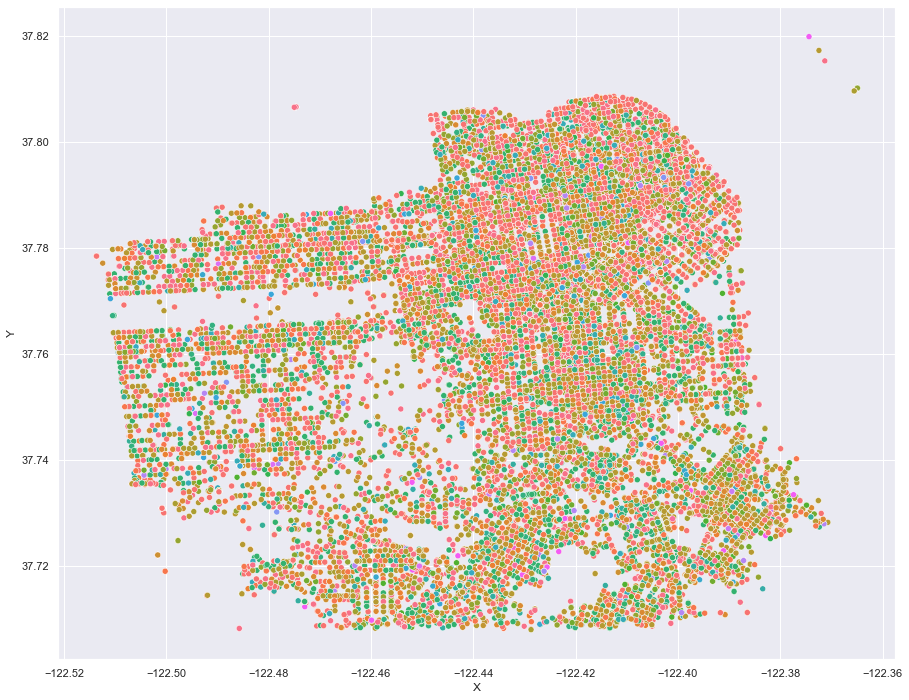

In [14]:
plt.figure(figsize=(15,12))
sns.scatterplot(
    data=dfsample,
    x="X", y="Y", 
    hue="Category",
    legend=False
)

<AxesSubplot:xlabel='Category', ylabel='Density'>

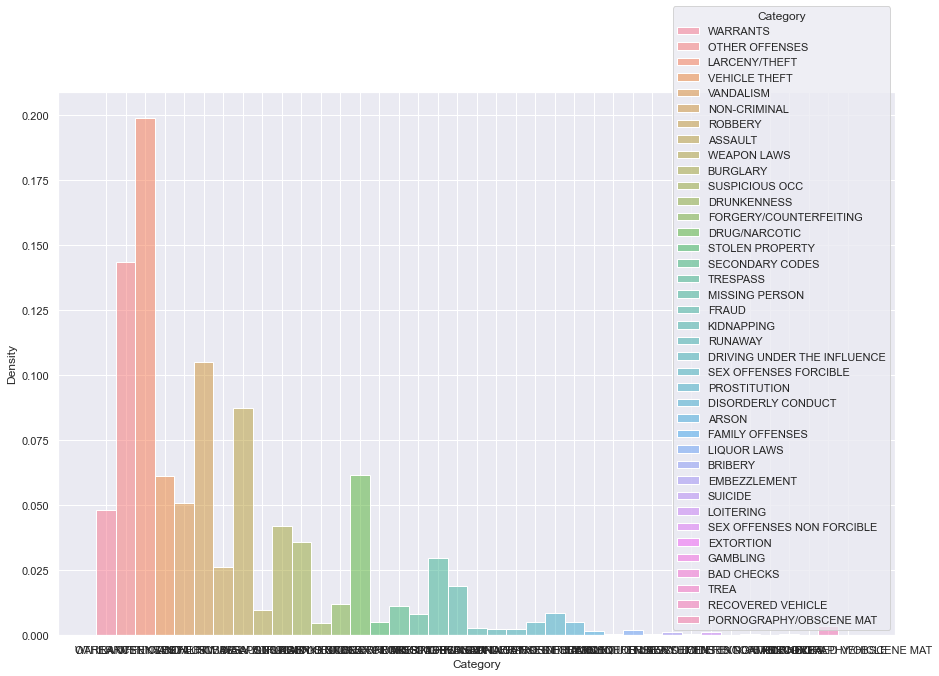

In [43]:
plt.figure(figsize=(15,10))
sns.histplot(
    data=df,
    x="Category",
    stat='density',
    discrete=True,
    hue="Category",
)

<AxesSubplot:xlabel='Hour', ylabel='Count'>

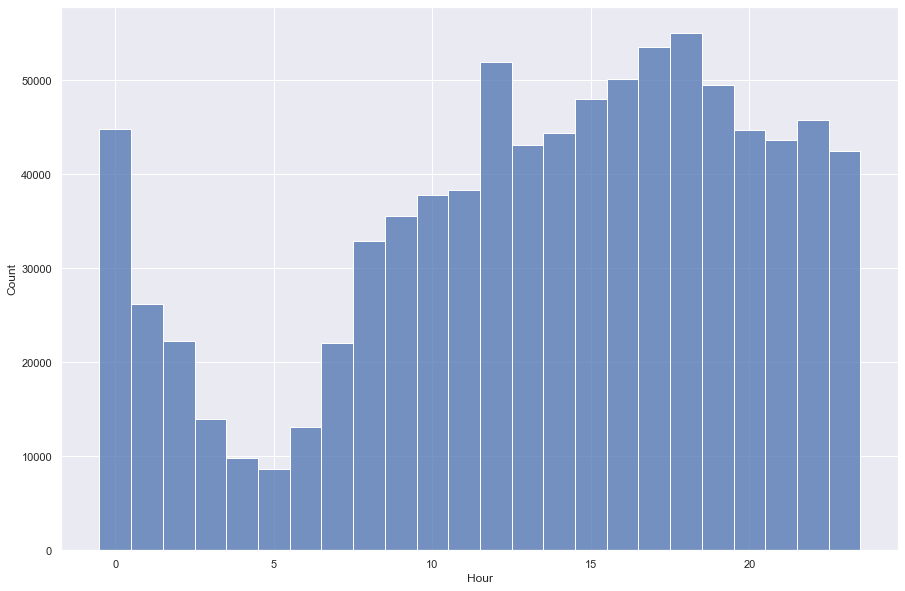

In [49]:
plt.figure(figsize=(15,10))
sns.histplot(
    data = df,
    x = 'Hour',
    discrete=True
)

<Figure size 1080x720 with 0 Axes>

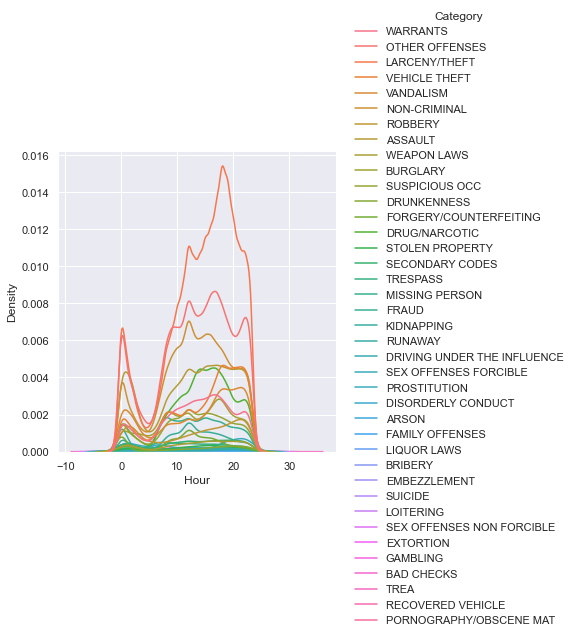

In [51]:
sns.displot(
    data = df,
    x = 'Hour',
    hue = 'Category',
    kind='kde'
)

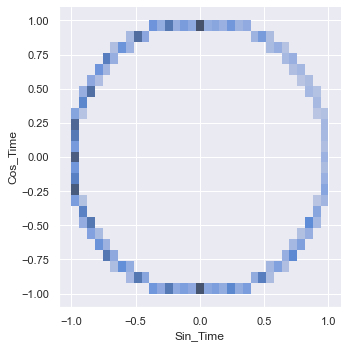

In [65]:
sns.displot(
    data = dfsample,
    x = 'Sin_Time',
    y = 'Cos_Time'
)